
---

# Clustering Tweets Using K-Means and TF-IDF

---

### **Introduction**
This project employs text clustering techniques to group synthetic tweets into meaningful clusters. By leveraging natural language processing (NLP) and machine learning, it demonstrates how to preprocess raw text, extract meaningful features, and apply K-Means clustering to uncover patterns within textual data.

---

### **Purpose and Objectives**
The primary goals of this project are:
1. To preprocess and clean textual data for machine learning applications.
2. To apply K-Means clustering to group similar tweets based on content.
3. To visualize and interpret the clusters using PCA.
4. To identify the most representative terms for each cluster.
5. To predict the cluster membership of new, unseen tweets.

---

### **Key Components and Explanation**

#### **1. Dataset**
- **Source:** Synthetic tweets dataset.
- **Features Used:** 
  - `tweets`: Raw textual data containing synthetic tweets.

---

### **2. Data Preprocessing**
Effective preprocessing is key to clustering text data. The following steps were performed:

##### **Preprocessing Steps**
1. **Lowercasing:** Standardizes text for consistency.
2. **Emoji Replacement:** Replaces emojis with a placeholder ("EMOJI") for uniformity.
3. **Text Cleaning:**
   - Removes hashtags, mentions, and URLs.
   - Eliminates punctuation and non-alphanumeric characters.
   - Reduces consecutive repeated letters (e.g., "cooool" → "cool").
4. **Tokenization:** Splits text into individual words.
5. **Stopword Removal:** Removes commonly used words (e.g., "the", "is") that don’t add semantic value.
6. **Lemmatization:** Reduces words to their base forms (e.g., "running" → "run").

---

### **3. Feature Extraction**
- **TF-IDF Vectorization:** Converts the cleaned and lemmatized tweets into numerical feature vectors. 
  - Captures the importance of terms across all tweets.
  - Ensures high-dimensional sparse representation suitable for clustering.

---

### **4. Clustering with K-Means**
- **Optimal Number of Clusters:** Determined using the **Elbow Method**:
  - Plots the inertia (sum of squared distances of samples to their closest cluster center) against the number of clusters.
  - Optimal clusters are chosen at the "elbow point" where the rate of decrease in inertia slows down.
- **K-Means Algorithm:** Groups tweets into \( k = 3 \) clusters based on content similarity.

---

### **5. Dimensionality Reduction**
- **PCA (Principal Component Analysis):** Reduces the high-dimensional TF-IDF vectors to two components for visualization.
- **Visualization:** Clusters are plotted in a 2D space to visually inspect the separation between clusters.

---

### **6. Top Terms in Each Cluster**
- Extracts the top \( n \) terms from each cluster's centroid to interpret the topics represented by the clusters.

---

### **7. Predictions for New Data**
- New tweets are preprocessed using the same pipeline.
- TF-IDF transformation and K-Means prediction are applied to determine cluster membership.

---

### **Sample Output**

#### **Optimal Number of Clusters (Elbow Method)**
A plot showing the "elbow point" suggests \( k = 3 \) as the optimal number of clusters.

#### **Cluster Visualization**
A scatterplot of the PCA-reduced features, color-coded by cluster labels, shows distinct groupings of tweets.

#### **Top Terms in Each Cluster**
```
Cluster 0: ai, data, future, learning, technology
Cluster 1: game, team, win, sport, player
Cluster 2: graphic, design, model, rendering, image
```

#### **Predictions for New Tweets**
```
Input: ["AI is changing everything! 🚀 #future", "Join our webinar on AI advancements."]
Predictions: [Cluster 0, Cluster 0]
```

---


---

### **Applications**
This clustering approach has practical applications such as:
- **Market Research:** Grouping customer reviews by sentiment or topics.
- **Social Media Analysis:** Identifying trending topics or user intent in tweets.
- **Content Recommendation:** Suggesting similar posts or products based on clustered content.
- **Event Monitoring:** Grouping live tweets into events or themes for quick insights.

---

### **Code Implementation**



In [5]:
import re
import string
import emoji
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import download

In [4]:
pip install emoji

     ------------------------------------ 586.9/586.9 kB 159.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Ensure required NLTK data is downloaded
download('stopwords')
download('punkt')
download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


True

In [14]:
download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


True

In [10]:
df = pd.read_csv("synthetic_tweets.csv")


In [11]:
df.head()

,tweets
0,Big data and AI are transforming industries. 🎉...
1,Coding is the language of the future. 💻 #Tech ...
2,Big data and AI are transforming industries. 💻...
3,AI is the future! 🤖 #DataScience @DataLover ht...
4,Just read an amazing article on machine learni...


In [12]:
# Preprocessing functions
def preprocess_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    
    # Replace emojis with a placeholder
    tweet = emoji.replace_emoji(tweet, replace=" EMOJI ")
    
    # Remove consecutive letters
    tweet = re.sub(r'(\w)\1{2,}', r'\1', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#\w+', '', tweet)
    
    # Remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Remove links
    tweet = re.sub(r'http\S+|www\.\S+', '', tweet)
    
    # Remove punctuation and non-alphanumeric characters
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    
    return tweet

def tokenize_and_remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [word for word in words if word not in stop_words]

lemmatizer = WordNetLemmatizer()
def lemmatize_words(words):
    return [lemmatizer.lemmatize(word) for word in words]


In [15]:
# Apply preprocessing
df['cleaned_tweets'] = df['tweets'].apply(preprocess_tweet)
df['tokens'] = df['cleaned_tweets'].apply(tokenize_and_remove_stopwords)
df['lemmatized'] = df['tokens'].apply(lemmatize_words)
df['final_text'] = df['lemmatized'].apply(lambda x: ' '.join(x))

In [16]:
# Vectorize tweets using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['final_text'])

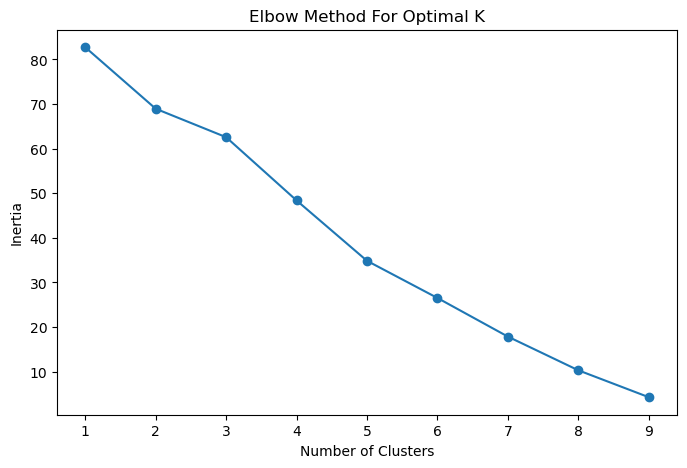

In [17]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
range_clusters = range(1, 10)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [18]:
# Fit the KMeans model with the optimal number of clusters (e.g., k=3 based on Elbow)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X)

df['cluster'] = labels

In [19]:
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X.toarray())



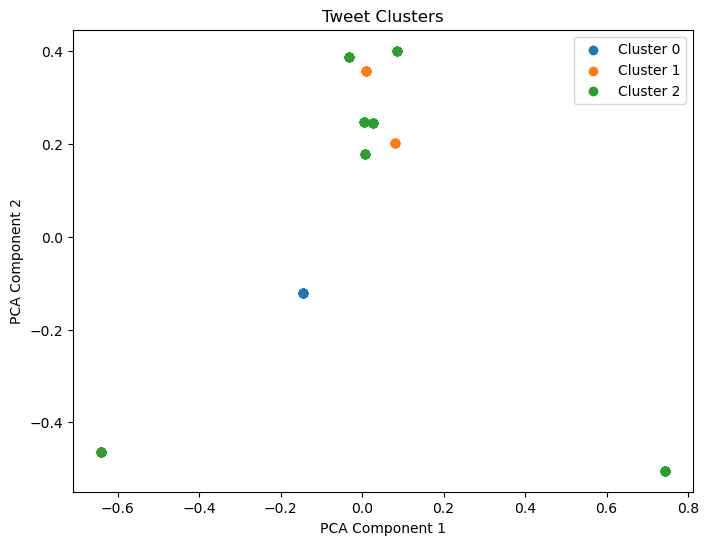

In [20]:
# Visualizing the clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_points = reduced_X[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
plt.title('Tweet Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [21]:
# Get top terms in each cluster
def get_top_terms_per_cluster(vectorizer, kmeans, n_terms=5):
    terms = vectorizer.get_feature_names_out()
    clusters_top_terms = {}
    for i in range(kmeans.n_clusters):
        cluster_center = kmeans.cluster_centers_[i]
        top_indices = cluster_center.argsort()[-n_terms:][::-1]
        clusters_top_terms[i] = [terms[index] for index in top_indices]
    return clusters_top_terms

top_terms = get_top_terms_per_cluster(vectorizer, kmeans)
print("Top terms per cluster:")
for cluster, terms in top_terms.items():
    print(f"Cluster {cluster}: {', '.join(terms)}")

# Predict new data
def predict_new_data(new_texts, vectorizer, kmeans):
    preprocessed_texts = [preprocess_tweet(text) for text in new_texts]
    tokenized_texts = [tokenize_and_remove_stopwords(text) for text in preprocessed_texts]
    lemmatized_texts = [' '.join(lemmatize_words(tokens)) for tokens in tokenized_texts]
    X_new = vectorizer.transform(lemmatized_texts)
    return kmeans.predict(X_new)



Top terms per cluster:
Cluster 0: science, exploring, today, technique, data
Cluster 1: amazing, breakthrough, robotics, learning, article
Cluster 2: ai, emoji, future, big, transforming


In [22]:
# Example prediction
new_tweets = ["AI is changing everything! 🚀 #future", "Join our webinar on AI advancements."]
predictions = predict_new_data(new_tweets, vectorizer, kmeans)
print("Predictions for new tweets:", predictions)

Predictions for new tweets: [2 2]



---

### **Future Enhancements**
1. **Dynamic Cluster Number:** Automate cluster selection using advanced techniques like silhouette analysis.
2. **Improved Visualization:** Use t-SNE or UMAP for non-linear dimensionality reduction.
3. **Scalability:** Test on larger datasets and implement distributed processing.
4. **Interactive Dashboard:** Build a web interface for real-time tweet clustering and exploration.

---

### **Conclusion**
This project demonstrates effective clustering of textual data using NLP and machine learning techniques. By preprocessing tweets, extracting meaningful features, and visualizing clusters, it highlights the potential of unsupervised learning in analyzing and interpreting text data. The ability to identify cluster topics and predict new tweet memberships adds practical value for real-world applications.

---
